# Quantification of WB

In [1]:
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

In [2]:
#Functions
def checkmarker(image1, image2, n):
    imag1RGB = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    imag2RGB = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    
    merge = cv2.addWeighted(src1 = imag1RGB, alpha = 0.8, src2 = imag2RGB, beta = 0.8, gamma = 0)
    
    plt.figure(figsize = (6,6))
    plotmerge = plt.imshow(merge)
    plt.axhline(y = n, color = 'green')
    
    return plotmerge
    
def Areaofinterest(image, x1, x2, y1, y2, n):
    plt.figure(figsize = (6,6))
    imagegray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Set width of each sample
    width_of_samples = (x2 - x1)/n
    lst_lim = [0]
    for i in range(n):
        lst_lim = lst_lim + [round(lst_lim[i] + width_of_samples)]
    
    #Show the area of interest and sections
    protfocus = imagegray[y1:y2,x1:x2]
    backgroundfocus = imagegray[y1-(y2-y1):y1,x1:x2]
    
    plt.figure(figsize = (10,10))
    plotprot = plt.imshow(protfocus)
    plt.axvline(lst_lim[1], color = "red")
    plt.axvline(lst_lim[2], color = "red")
    plt.axvline(lst_lim[3], color = "red")
    plt.axvline(lst_lim[4], color = "red")
    plt.axvline(lst_lim[5], color = "red")
    plt.axvline(lst_lim[6], color = "red")
    plt.axvline(lst_lim[7], color = "red")
    
    plt.figure(figsize = (10,10))
    plotbackground = plt.imshow(backgroundfocus)
    plt.axvline(lst_lim[1], color = "red")
    plt.axvline(lst_lim[2], color = "red")
    plt.axvline(lst_lim[3], color = "red")
    plt.axvline(lst_lim[4], color = "red")
    plt.axvline(lst_lim[5], color = "red")
    plt.axvline(lst_lim[6], color = "red")
    plt.axvline(lst_lim[7], color = "red")
    
    #Divide the image in sections and list them
    sample_areas = []
    background_areas = []
    for i in range(n): 
        sample = protfocus[:,int(lst_lim[i]):int(lst_lim[i+1])]
        sample_areas.append(sample)
        ground = backgroundfocus[:,int(lst_lim[i]):int(lst_lim[i+1])]
        background_areas.append(ground)
    
    return plotprot, plotbackground, sample_areas, background_areas

def sample_mark_quantification(sample1, sample2):
    sample = 0
    ground = 0
    wid = sample1.shape[1]
    hei = sample1.shape[0]
    area = wid*hei
    for row in range(hei):
        for col in range(wid):
            sample = sample + int(np.mean(sample1[row,col]))
            ground = ground + int(np.mean(sample2[row,col]))
    value = sample - ground
    fraction = (value / area)
    return int(fraction)

def plotrelativedensity(lstprot, lstcargo, lstnames):
    relative_levels = []
    for i in range(8):
        group = lstprot[i] / lstcargo[i]
        relative_levels.append(group)
    
    da = {'groups':lstnames,'Relative level' : [relative_levels[0],relative_levels[1],relative_levels[2],relative_levels[3],relative_levels[4],relative_levels[5],relative_levels[6],relative_levels[7]]}
    dataframe = pd.DataFrame(data = da)
    plt.figure(figsize = (10,10))
    sns.barplot(x= "groups", y= "Relative level", palette = "Set2", data = dataframe, capsize = 0.05)
    plt.title("Levels of protein")
    
    return plt.show()

# Working space

In [6]:
#Open and read image
#Image of Cargo protein
file3 = 'actina1.tif'
path3 = 'C:\\Users\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\wb\\AMPK\\actina\\{}'.format(file3)
actinamb1 = cv2.imread(path3)
file4 = 'actina1marker.tif'
path4 = 'C:\\Users\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\wb\\AMPK\\actina\\{}'.format(file4)
actinamarkermb1 = cv2.imread(path4)

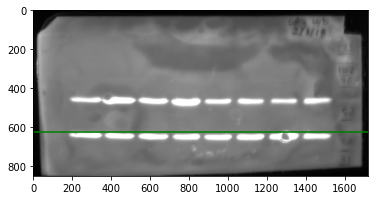

In [7]:
#Check marker
checkmarker(actinamb1, actinamarkermb1, 625)

In [12]:
#Open and read image
#Image of protein of interest
file5 = 'ampk2.tif'
path5 = 'C:\\Users\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\wb\\AMPK\\ampk\\2\\{}'.format(file5)
ampkmb2 = cv2.imread(path5)
file6 = 'ampk2 marker.tif'
path6 = 'C:\\Users\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\wb\\AMPK\\ampk\\2\\{}'.format(file6)
ampkmarkermb2 = cv2.imread(path6)

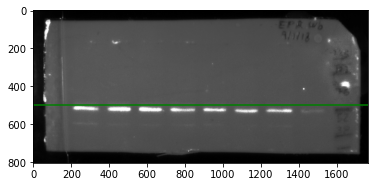

In [13]:
#Check marker
checkmarker(ampkmb2, ampkmarkermb2, 500)

<Figure size 432x432 with 0 Axes>

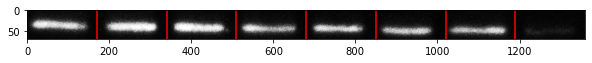

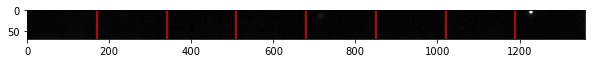

In [14]:
#Select region of interestf
ampkmb2, background_am_mb2, ampk_areas2, ampk_background_areas2 = Areaofinterest(ampkmb2,200,1560,480,550,8)

In [15]:
#Open and read image
#Image of Cargo protein
file7 = 'actina2.tif'
path7 = 'C:\\Users\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\wb\\AMPK\\actina\\{}'.format(file7)
actinamb2 = cv2.imread(path7)
file8 = 'actina2marker.tif'
path8 = 'C:\\Users\herdi\\Desktop\\Documentos\\Doctorado cs medicas\\Laboratorio\\Python protocolos\\imagenes\\wb\\AMPK\\actina\\{}'.format(file8)
actinamarkermb2 = cv2.imread(path8)

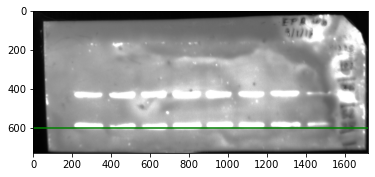

In [16]:
checkmarker(actinamb2, actinamarkermb2, 600)

<Figure size 432x432 with 0 Axes>

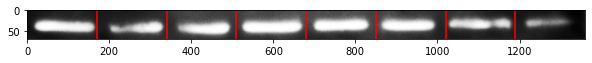

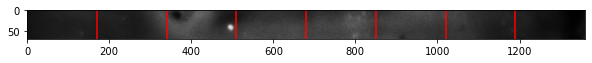

In [17]:
#Select region of interest
actinmb2, background_ac_mb2, actin_areas2,act_background_areas2 = Areaofinterest(actinamb2,195,1555,550,620,8)

In [18]:
#Quantification of protein levels without background
n_samples = 8
ampk_lvls = []
for i in range(n_samples):
    prot_lvl = sample_mark_quantification(ampk_areas2[i], ampk_background_areas2[i])
    if prot_lvl < 0:
        prot_lvl = 0
    ampk_lvls.append(prot_lvl)
ampk_lvls

[45, 51, 50, 35, 34, 32, 34, 2]

In [19]:
#Quantification of protein levels without background
n_samples = 8
act_lvls = []
for i in range(n_samples):
    prot_lvl = sample_mark_quantification(actin_areas2[i], act_background_areas2[i])
    if prot_lvl < 0:
        prot_lvl = 0
    act_lvls.append(prot_lvl)
act_lvls

[64, 40, 42, 73, 53, 47, 43, 22]

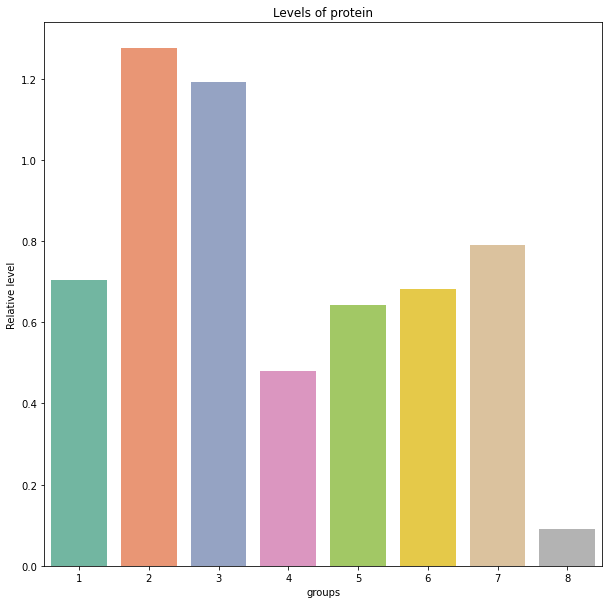

In [21]:
#Level of protein relative to cargo protein
lst_names = ['1','2','3','4','5','6','7','8']
plotrelativedensity(ampk_lvls, act_lvls, lst_names)